<a href="https://colab.research.google.com/github/Antika20/Repo_Latihan_Machine_Learning/blob/main/Algoritma_Apple_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mhantor/apple-leaf-diseases

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/DATASET/apel.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/apel/Apple_Disease'

In [ ]:
print(os.listdir(base_dir))

['Apple_black_rot', 'Apple_cedar_rust', 'Apple_scab']


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

    print("Total Files : " + str(total_files))

Total Files : 170
Total Files : 330
Total Files : 480


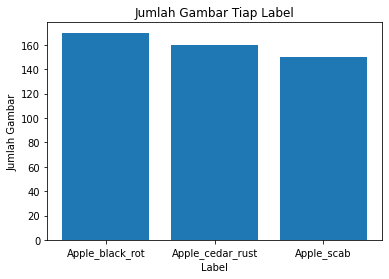

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

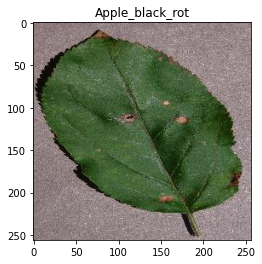

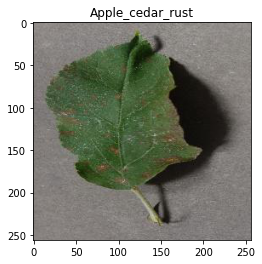

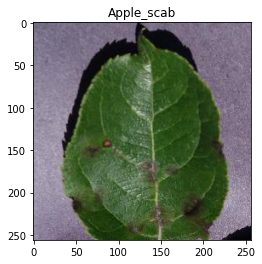

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [ ]:
base_dir = '/content/apel/Apple_Disease'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

cedar_dir = os.path.join(base_dir,'/content/apel/Apple_Disease/Apple_cedar_rust')
black_dir = os.path.join(base_dir, '/content/apel/Apple_Disease/Apple_black_rot')
scap_dir = os.path.join(base_dir, '/content/apel/Apple_Disease/Apple_scab')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_cedar = os.path.join(train_dir, 'cedar')
train_black = os.path.join(train_dir, 'black')
train_scab = os.path.join(train_dir, 'scab')

val_cedar = os.path.join(validation_dir, 'cedar')
val_black = os.path.join(validation_dir, 'black')
val_scab = os.path.join(validation_dir, 'scab')

In [ ]:
os.mkdir(train_cedar)
os.mkdir(train_black)
os.mkdir(train_scab)

os.mkdir(val_cedar)
os.mkdir(val_black)
os.mkdir(val_scab)

In [ ]:
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_cedar_dir, val_cedar_dir = train_test_split(os.listdir(cedar_dir), test_size = 0.40)
train_black_dir, val_black_dir = train_test_split(os.listdir(black_dir), test_size = 0.40)
train_scab_dir, val_scab_dir = train_test_split(os.listdir(scap_dir), test_size = 0.40)

In [ ]:
for file in train_cedar_dir:
  shutil.copy(os.path.join(cedar_dir, file), os.path.join(train_cedar, file))
for file in train_black_dir:
  shutil.copy(os.path.join(black_dir,file), os.path.join(train_black,file))
for file in train_scab_dir:
  shutil.copy(os.path.join(scap_dir,file), os.path.join(train_scab,file))
for file in val_cedar_dir:
  shutil.copy(os.path.join(cedar_dir, file), os.path.join(val_cedar,file))
for file in val_black_dir:
  shutil.copy(os.path.join(black_dir,file), os.path.join(val_black,file))
for file in val_scab_dir:
  shutil.copy(os.path.join(scap_dir,file), os.path.join(val_scab,file))

In [ ]:
# Image Processing

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validasi_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 288 images belonging to 3 classes.
Found 192 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'), # membuat model Cnn nya 
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary() # untuk melihat arsiteksur model CNN 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# Mengecek GPU 
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Use ModelCheckpoint as callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint('modelApple.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
History = model.fit(
    training_generator,
    epochs=20,
    validation_data=validasi_generator, # melatih model CNN DENGAN FIT 
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.34375, saving model to modelApple.h5
9/9 - 16s - loss: 1.0888 - accuracy: 0.3368 - val_loss: 1.0587 - val_accuracy: 0.3438 - 16s/epoch - 2s/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.34375 to 0.62500, saving model to modelApple.h5
9/9 - 3s - loss: 0.9759 - accuracy: 0.4861 - val_loss: 0.9256 - val_accuracy: 0.6250 - 3s/epoch - 359ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.62500 to 0.65625, saving model to modelApple.h5
9/9 - 3s - loss: 0.7892 - accuracy: 0.7014 - val_loss: 0.9092 - val_accuracy: 0.6562 - 3s/epoch - 353ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.65625 to 0.71875, saving model to modelApple.h5
9/9 - 3s - loss: 0.5466 - accuracy: 0.8160 - val_loss: 0.9164 - val_accuracy: 0.7188 - 3s/epoch - 356ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.71875
9/9 - 5s - loss: 0.4768 - accuracy: 0.8194 - val_loss: 1.5083 - val_accuracy: 0.6938 - 5s/epoch - 517ms/step
Epoc

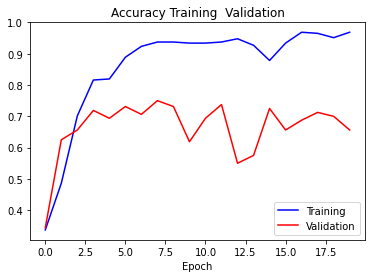

In [ ]:
plt.plot(History.history['accuracy'], label='Training', color='blue')
plt.plot(History.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training  Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

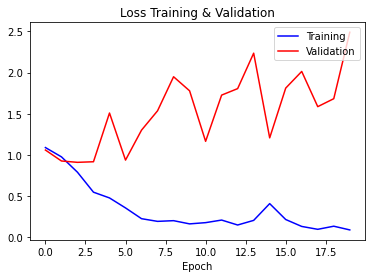

In [ ]:
plt.plot(History.history['loss'], label='Training', color='blue')
plt.plot(History.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Saving Scab (6).JPG to Scab (6).JPG
Scab


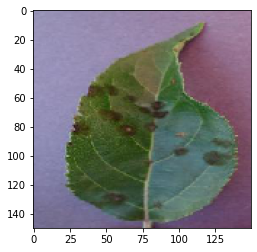

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  
 
   # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10) 
  if classes[0,0]!=0:
    print('Black Rot')
  elif classes[0,1]!=0:
    print('Black Cedar')
  else:
    print('Scab')

In [ ]:
!ls -la

total 4376
drwxr-xr-x 1 root root    4096 Jun 29 04:47  .
drwxr-xr-x 1 root root    4096 Jun 29 04:43  ..
drwxr-xr-x 3 root root    4096 Jun 29 04:45  apel
drwxr-xr-x 2 root root   12288 Jun 29 04:45  Apple_black_rot
drwxr-xr-x 2 root root   12288 Jun 29 04:45  Apple_cedar_rust
drwxr-xr-x 2 root root    4096 Jun 29 04:45  Apple_scab
drwxr-xr-x 4 root root    4096 Jun 15 13:41  .config
drwx------ 5 root root    4096 Jun 29 04:44  drive
-rw-r--r-- 1 root root 4411712 Jun 29 04:45  modelApple.h5
drwxr-xr-x 1 root root    4096 Jun 15 13:42  sample_data
-rw-r--r-- 1 root root    9048 Jun 29 04:47 'Scab (6).JPG'


In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [ ]:
# Convert the model to tflite format
import pathlib

History = tf.keras.models.load_model('modelApple.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('modelApple.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpl6vho9p3/assets


1453736

In [ ]:
!pip install tflite-support-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [ ]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "modelApple.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "label_Apple.txt"
_SAVE_TO_PATH = "modelApple_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba